C:\Users\121731\AppData\Local\Temp\ipykernel_23944\601993917.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
C:\Users\121731\AppData\Local\Temp\ipykernel_23944\601993917.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


Liczba r potrzebna do zachowania >30% energii: 1


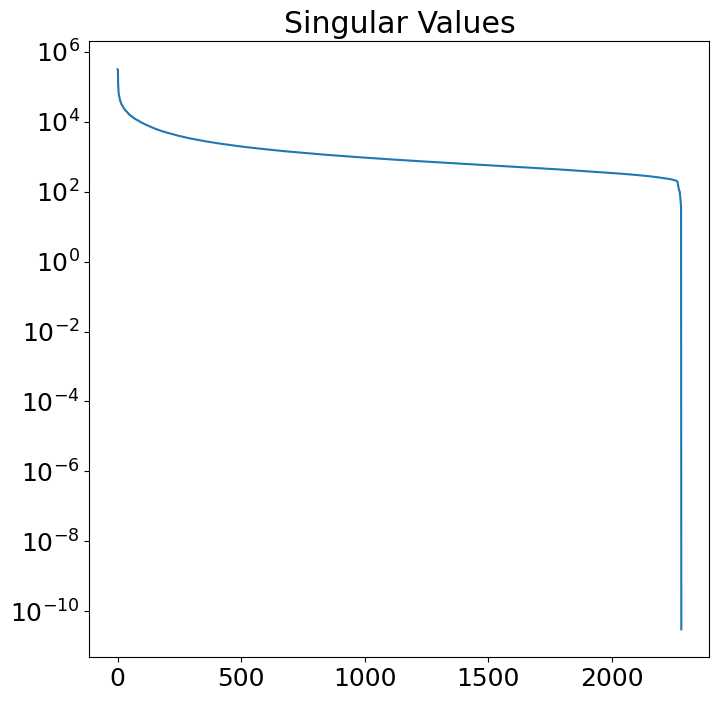

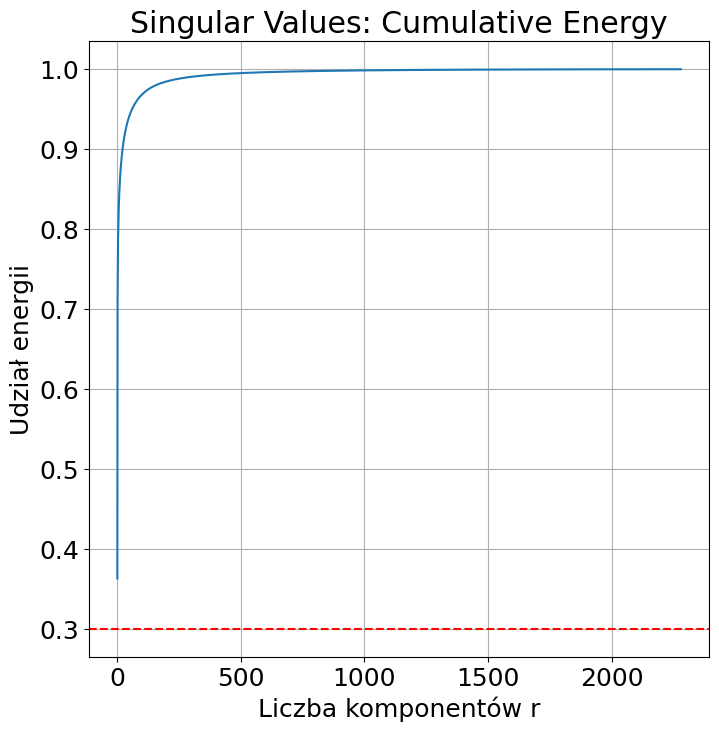

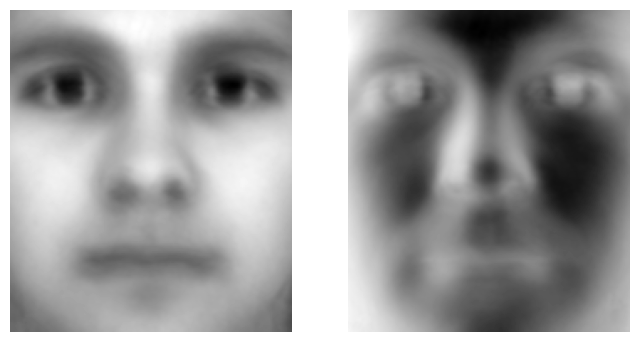

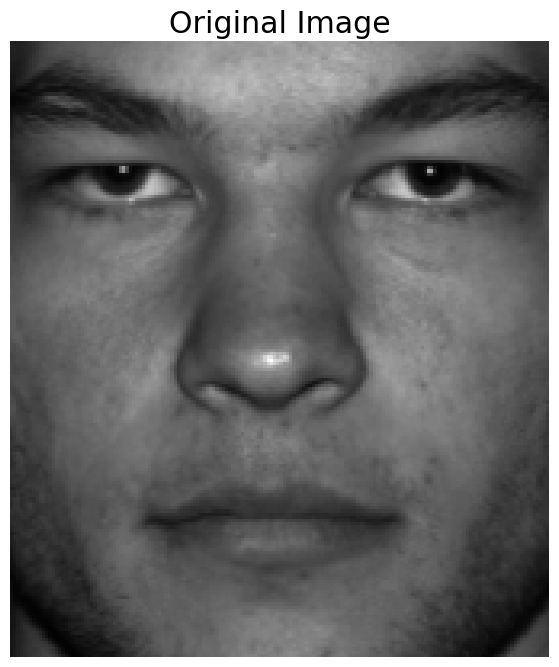

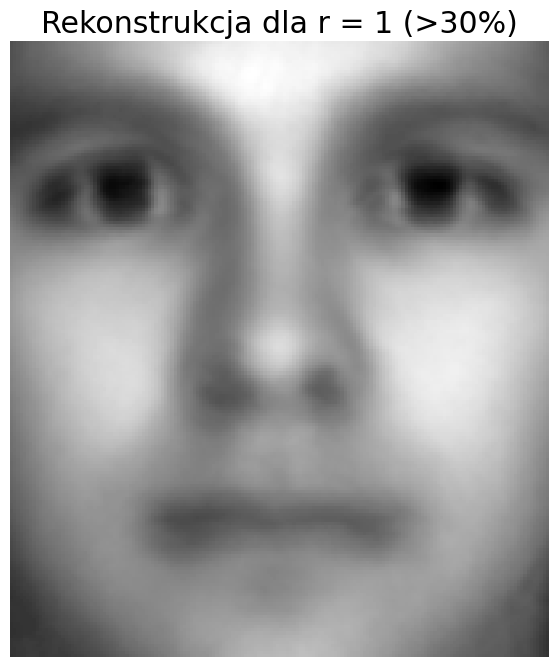

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])


trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)


X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)


energy = S**2
cumulative_energy = np.cumsum(energy)
total_energy = np.sum(energy)


k_threshold = 0.30
r = np.argmax(cumulative_energy / total_energy > k_threshold) + 1
print(f"Liczba r potrzebna do zachowania >30% energii: {r}")

plt.figure()
plt.semilogy(S)
plt.title('Singular Values')
plt.show()

plt.figure()
plt.plot(cumulative_energy / total_energy)
plt.title('Singular Values: Cumulative Energy')
plt.axhline(y=k_threshold, color='r', linestyle='--')
plt.xlabel('Liczba komponentów r')
plt.ylabel('Udział energii')
plt.grid()
plt.show()

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T, cmap='gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:, 0], (m, n)).T, cmap='gray')
plt.axis('off')
plt.show()


testFace = faces[:, np.sum(nfaces[:36])]  
plt.imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
reconFace = avgFace + U[:, :r] @ (U[:, :r].T @ testFaceMS)

plt.imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
plt.title(f'Rekonstrukcja dla r = {r} (>30%)')
plt.axis('off')
plt.show()